<a href="https://colab.research.google.com/github/Tiamiyu1/HDSC-Premiere-Project-Team_PCA-/blob/main/Model%20Building/modeling_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I oversampled the dataset to make it a balanced dataset, after that, I followed the modelling notebook to test the balanced dataset, which improved the overall f1_score. RandomforestClassifier has the highest value.     Also, I tried removing some columns due to their correlation value with the target feature (CDR) but all model but one, tested with it gave lower f1_score compared to the baseline I got when I used all available features. The one with better F1 score had the male column removed and the algorithm used was randomforestclassifier

# Step 2 - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Tiamiyu1/HDSC-Premiere-Project-Team_PCA-/main/Data/dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

#### ENCODING CATEGORICAL DATA

#### Two categorical columns: M/F and Group.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder.
ohe = OneHotEncoder()

# Perform OneHotEncoding on the Group column.
df_ohe1 = pd.DataFrame(ohe.fit_transform(df[['Group']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with df dataframe.
df2 = df.join(df_ohe1)

# View dataframe.
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0


In [5]:
# Perform OneHotEncoding on the M/F column.
df_ohe2 = pd.DataFrame(ohe.fit_transform(df[['M/F']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with dataframe.
df_final = df2.join(df_ohe2)

# View final dataframe.
df_final

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [6]:
df = df_final

#### We can decide to drop the Group and M/F columns since they have been encoded.

In [7]:
# df.drop(['Group', 'M/F'], axis=1, inplace=True)
# df

# Oversampling

In [8]:
#oversampling
class_count_0, class_count_1,class_count_3, class_count_4 = df['CDR'].value_counts()

In [9]:
class_0 = df[df['CDR']== 0.0]
class_1 = df[df['CDR']== 0.5]
class_2 = df[df['CDR']== 1.0]
class_3 = df[df['CDR']== 2.0]

In [10]:
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)

class 0: (206, 20)
class 1: (123, 20)
class 2: (41, 20)
class 3: (3, 20)


In [11]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_2_over = class_2.sample(class_count_0, replace=True)
class_3_over = class_3.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_2_over, class_3_over, class_0], axis=0)




In [12]:
print("total class of 1, 2, 3  and 0:",test_over['CDR'].value_counts())# plot the count after under-sampeling

total class of 1, 2, 3  and 0: 0.5    206
1.0    206
2.0    206
0.0    206
Name: CDR, dtype: int64


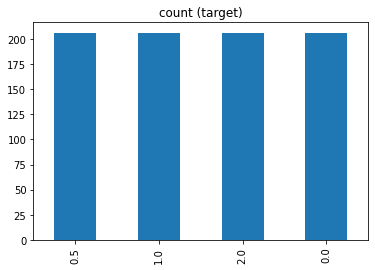

In [13]:
test_over['CDR'].value_counts().plot(kind='bar', title='count (target)')

In [14]:
test_over

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
322,OAS2_0160,OAS2_0160_MR1,Demented,1,0,M,R,76,12,NaN,27.0,0.5,1557,0.705,1.127,0.0,1.0,0.0,0.0,1.0
356,OAS2_0181,OAS2_0181_MR1,Demented,1,0,F,R,74,12,NaN,26.0,0.5,1171,0.733,1.499,0.0,1.0,0.0,1.0,0.0
126,OAS2_0060,OAS2_0060_MR1,Demented,1,0,M,R,75,13,4.0,29.0,0.5,1416,0.766,1.239,0.0,1.0,0.0,0.0,1.0
344,OAS2_0175,OAS2_0175_MR2,Demented,2,700,M,R,72,16,4.0,28.0,0.5,1796,0.732,0.977,0.0,1.0,0.0,0.0,1.0
235,OAS2_0113,OAS2_0113_MR1,Demented,1,0,F,R,73,13,2.0,23.0,0.5,1536,0.725,1.142,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [15]:
df1=test_over.copy()

In [16]:
df1.reset_index()

,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,322,OAS2_0160,OAS2_0160_MR1,Demented,1,0,M,R,76,12,NaN,27.0,0.5,1557,0.705,1.127,0.0,1.0,0.0,0.0,1.0
1,356,OAS2_0181,OAS2_0181_MR1,Demented,1,0,F,R,74,12,NaN,26.0,0.5,1171,0.733,1.499,0.0,1.0,0.0,1.0,0.0
2,126,OAS2_0060,OAS2_0060_MR1,Demented,1,0,M,R,75,13,4.0,29.0,0.5,1416,0.766,1.239,0.0,1.0,0.0,0.0,1.0
3,344,OAS2_0175,OAS2_0175_MR2,Demented,2,700,M,R,72,16,4.0,28.0,0.5,1796,0.732,0.977,0.0,1.0,0.0,0.0,1.0
4,235,OAS2_0113,OAS2_0113_MR1,Demented,1,0,F,R,73,13,2.0,23.0,0.5,1536,0.725,1.142,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
820,364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
821,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
822,371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


For __Feature Engineering__ the __Train data__ should only be taken into consideration for the statistics value and 

then these values will be then used for both train and test. This is the best and optimal way to prevent the 

overfitting later in Model Building part.

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df1.drop('CDR' , axis=1) , df1['CDR'] , test_size=0.3 , 
                                                      random_state=2)

In [18]:
X_train.shape , X_test.shape

((576, 19), (248, 19))

### 1) Missing Value Imputation
- by Median Imputation method

In [19]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.052083
MMSE    0.005208
dtype: float64

So SES has 5% of missing values and MMSE has .05% of missign values

In [20]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [21]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [22]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0
137,OAS2_0064,OAS2_0064_MR2,Demented,2,830,F,R,81,8,5.0,26.0,1459,0.694,1.203,0.0,1.0,0.0,1.0,0.0,5.0,26.0
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1957,0.734,0.897,0.0,1.0,0.0,0.0,1.0,1.0,30.0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0


In [23]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0
78,OAS2_0040,OAS2_0040_MR1,Demented,1,0,M,R,84,6,4.0,25.0,1310,0.727,1.339,0.0,1.0,0.0,0.0,1.0,4.0,25.0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0


__Cheking out the distribution after imputation__

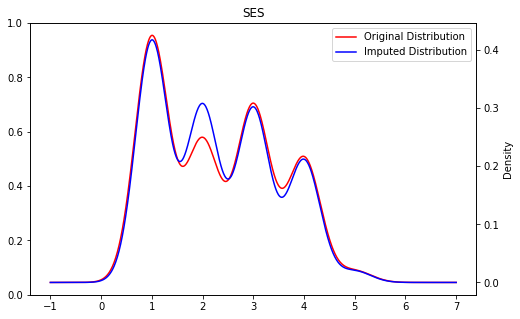

In [24]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

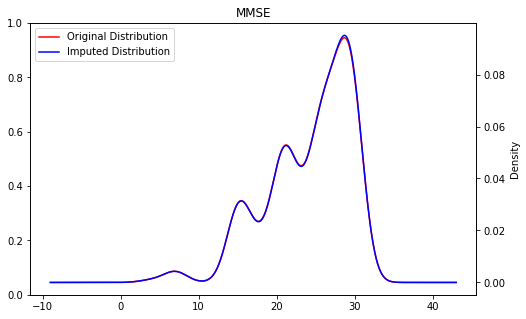

In [25]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

__Variance__

In [26]:
X_train['SES'].var() , X_train['SES_imputed'].var()  
# so we can also see the change in the variance

(1.37233256040595, 1.3053592995169105)

In [27]:
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()  
# almost same 

(28.830727736486963, 28.802125603864727)

__Covariance__

In [28]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
Visit,0.646365,351.342790,0.563140,0.221486,-0.117606,-0.889726,8.906679,-0.004593,-0.007773,0.016322,-0.020900,0.004577,-0.036002,0.036002,-0.113919,-0.866039
MR Delay,351.342790,256877.640761,911.919855,169.376848,-43.331445,-104.567419,2859.159819,-1.981156,-2.864379,23.630815,-45.207373,21.576558,8.866993,-8.866993,-41.064257,-95.026812
Age,0.563140,911.919855,73.944155,3.681594,-2.473280,0.760663,-102.916184,-0.138578,0.055985,0.114420,0.076256,-0.190676,1.184396,-1.184396,-2.327705,0.708599
EDUC,0.221486,169.376848,3.681594,8.439891,-2.573102,1.260709,233.413297,0.009834,-0.173637,0.031033,-0.037591,0.006558,-0.383007,0.383007,-2.404909,1.180145
SES,-0.117606,-43.331445,-2.473280,-2.573102,1.372333,-0.458887,-84.958443,0.001889,0.064390,-0.043906,0.005347,0.038559,0.101966,-0.101966,1.372333,-0.458887
MMSE,-0.889726,-104.567419,0.760663,1.260709,-0.458887,28.830728,35.538510,0.086635,-0.010818,0.298850,-1.470505,1.171655,-0.176869,0.176869,-0.464928,28.830728
eTIV,8.906679,2859.159819,-102.916184,233.413297,-84.958443,35.538510,27360.691582,0.392205,-20.661804,-3.035453,3.902639,-0.867186,-47.803998,47.803998,-79.647820,26.714734
nWBV,-0.004593,-1.981156,-0.138578,0.009834,0.001889,0.086635,0.392205,0.001276,-0.000170,0.000444,-0.005759,0.005315,-0.001105,0.001105,0.001732,0.086667
ASF,-0.007773,-2.864379,0.055985,-0.173637,0.064390,-0.010818,-20.661804,-0.000170,0.015920,0.002198,-0.003771,0.001573,0.035259,-0.035259,0.060328,-0.002427
"(Converted,)",0.016322,23.630815,0.114420,0.031033,-0.043906,0.298850,-3.035453,0.000444,0.002198,0.063234,-0.047455,-0.015779,0.005091,-0.005091,-0.040534,0.295580


We can see that Variable covariance is also changed for the `SES` variable but for the `MMSE` is almost same there is no change

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [29]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [30]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
137,OAS2_0064,OAS2_0064_MR2,Demented,2,830,F,R,81,8,5.0,26.0,1459,0.694,1.203,0.0,1.0,0.0,1.0,0.0,5.0,26.0,0
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1957,0.734,0.897,0.0,1.0,0.0,0.0,1.0,1.0,30.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0


In [31]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
78,OAS2_0040,OAS2_0040_MR1,Demented,1,0,M,R,84,6,4.0,25.0,1310,0.727,1.339,0.0,1.0,0.0,0.0,1.0,4.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [32]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [33]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
137,OAS2_0064,OAS2_0064_MR2,Demented,2,830,F,R,81,8,1459,0.694,1.203,0.0,1.0,0.0,1.0,0.0,5.0,26.0,0
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1957,0.734,0.897,0.0,1.0,0.0,0.0,1.0,1.0,30.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0


In [34]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
78,OAS2_0040,OAS2_0040_MR1,Demented,1,0,M,R,84,6,1310,0.727,1.339,0.0,1.0,0.0,0.0,1.0,4.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [35]:
X_train.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [36]:
X_test.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

__So there are now no missing data in the dataset__

In [37]:
y_test

184    2.0
78     0.5
184    2.0
251    2.0
330    2.0
      ... 
195    0.5
245    0.0
239    0.5
344    0.5
308    1.0
Name: CDR, Length: 248, dtype: float64

In [38]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
78,OAS2_0040,OAS2_0040_MR1,Demented,1,0,M,R,84,6,1310,0.727,1.339,0.0,1.0,0.0,0.0,1.0,4.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [39]:
# We changed the 4 class to 0,1,2,an 3 so that the model don't see it as a continous value

y_testt=y_test.replace({0.0:0, 0.5:1, 1.0:1, 2.0:1}).astype('int')
y_trainn=y_train.replace({0.0:0, 0.5:1, 1.0:1, 2.0:1}).astype('int')

y_test=y_test.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')
y_train=y_train.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')

In [40]:
# We drop the columns that are not useful to the model
X_train.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)
X_test.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)

In [41]:
X_train.drop(['Group'], axis=1, inplace=True)
X_test.drop(['Group'], axis=1, inplace=True)

In [42]:
X_train.drop(['M/F'], axis=1, inplace=True)
X_test.drop(['M/F'], axis=1, inplace=True)

In [43]:
X_trainn=X_train.copy
X_testt=X_test.copy 

In [44]:
# We can use this binary classification to predict the probability of 
# a patient have dementia

# def proba(n):
#     if n == 0:
#         return 0
#     else:
#         return 1


# df['yy'] = df['CDR'].apply(lambda x: proba(x))

## Modeling

In [45]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
base_model = LogisticRegression(solver="liblinear")
base_model.fit(X_train,y_train)

print(f1_score(y_test,base_model.predict(X_test), average='weighted'))

0.8916492340969542


In [47]:
print(confusion_matrix(y_test, base_model.predict(X_test)))
print('*'*50)
print(classification_report(y_test, base_model.predict(X_test)))


[[59  1  0  0]
 [ 0 56  3  4]
 [ 0 10 38  8]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.84      0.89      0.86        63
           2       0.93      0.68      0.78        56
           3       0.85      1.00      0.92        69

    accuracy                           0.90       248
   macro avg       0.90      0.89      0.89       248
weighted avg       0.90      0.90      0.89       248



In [48]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train,y_train)

print(f1_score(y_test,gbt.predict(X_test), average='weighted'))

0.9839356950693406


In [49]:
print(confusion_matrix(y_test, gbt.predict(X_test)))
print('*'*50)
print(classification_report(y_test, gbt.predict(X_test)))


[[59  1  0  0]
 [ 0 63  0  0]
 [ 0  3 53  0]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        63
           2       1.00      0.95      0.97        56
           3       1.00      1.00      1.00        69

    accuracy                           0.98       248
   macro avg       0.99      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [50]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train,y_train)

print(f1_score(y_test,rfc.predict(X_test), average='weighted'))

0.9717793526305157


In [51]:
print(confusion_matrix(y_test, rfc.predict(X_test)))
print('*'*50)
print(classification_report(y_test, rfc.predict(X_test)))


[[59  1  0  0]
 [ 0 60  1  2]
 [ 0  3 53  0]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      0.95      0.94        63
           2       0.98      0.95      0.96        56
           3       0.97      1.00      0.99        69

    accuracy                           0.97       248
   macro avg       0.97      0.97      0.97       248
weighted avg       0.97      0.97      0.97       248



In [52]:
dtc = DecisionTreeClassifier(max_depth=3,random_state = 7)

dtc.fit(X_train,y_train)

print(f1_score(y_test,dtc.predict(X_test), average='weighted'))

0.8350878683532804


In [53]:
print(confusion_matrix(y_test, dtc.predict(X_test)))
print('*'*50)
print(classification_report(y_test, dtc.predict(X_test)))


[[56  4  0  0]
 [ 0 49  2 12]
 [ 0 15 34  7]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.72      0.78      0.75        63
           2       0.94      0.61      0.74        56
           3       0.78      1.00      0.88        69

    accuracy                           0.84       248
   macro avg       0.86      0.83      0.83       248
weighted avg       0.86      0.84      0.84       248



In [54]:
#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
#     print(sorted_feat.shape)
    
    plt.figure(figsize=(5, 5))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()

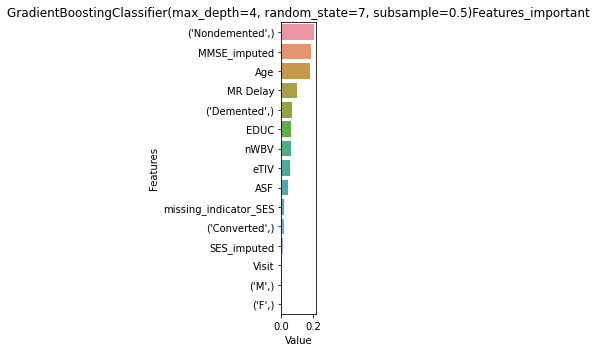

In [55]:
import warnings
feat_imp_ploter(gbt, X_train)

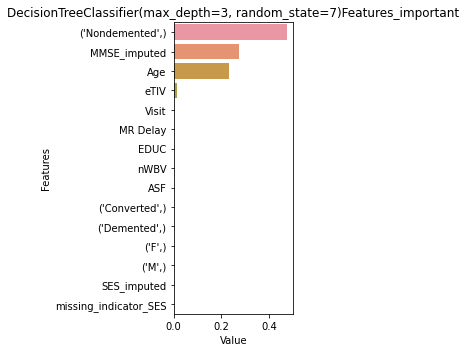

In [56]:
feat_imp_ploter(dtc, X_train)

In [57]:
corr= df1.corr()
corr

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
Visit,1.000000,0.876930,0.103403,0.075994,-0.129813,-0.182567,0.071464,0.110648,-0.167598,-0.119196,0.100327,-0.085256,0.033512,-0.094113,0.094113
MR Delay,0.876930,1.000000,0.232593,0.088524,-0.085778,-0.020108,0.016642,0.077983,-0.134935,-0.089456,0.208675,-0.214176,0.109617,0.025617,-0.025617
Age,0.103403,0.232593,1.000000,0.156448,-0.266902,-0.023307,0.331337,-0.032868,-0.493115,0.006915,0.064930,0.038546,-0.079830,0.286248,-0.286248
EDUC,0.075994,0.088524,0.156448,1.000000,-0.756877,0.077469,0.269783,0.465090,0.084118,-0.450210,0.047238,-0.054744,0.031595,-0.220903,0.220903
SES,-0.129813,-0.085778,-0.266902,-0.756877,1.000000,-0.058450,-0.249616,-0.414938,0.068691,0.414231,-0.133181,0.025077,0.051522,0.131846,-0.131846
MMSE,-0.182567,-0.020108,-0.023307,0.077469,-0.058450,1.000000,-0.641397,0.031180,0.464792,-0.005370,0.215345,-0.600155,0.523463,-0.071100,0.071100
CDR,0.071464,0.016642,0.331337,0.269783,-0.249616,-0.641397,1.000000,0.111635,-0.338385,-0.138927,-0.193972,0.699664,-0.644115,0.052144,-0.052144
eTIV,0.110648,0.077983,-0.032868,0.465090,-0.414938,0.031180,0.111635,1.000000,0.025447,-0.990053,-0.064620,0.043652,-0.009387,-0.590002,0.590002
nWBV,-0.167598,-0.134935,-0.493115,0.084118,0.068691,0.464792,-0.338385,0.025447,1.000000,0.008536,0.025879,-0.347298,0.361012,-0.067226,0.067226
ASF,-0.119196,-0.089456,0.006915,-0.450210,0.414231,-0.005370,-0.138927,-0.990053,0.008536,1.000000,0.061192,-0.058106,0.027054,0.570828,-0.570828


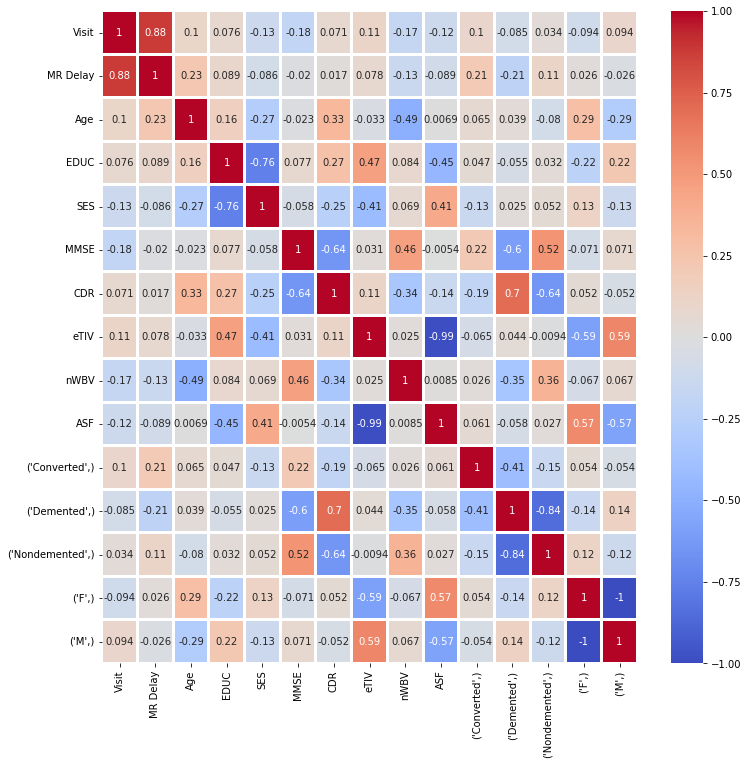

In [58]:

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

In [59]:
#From the correlation chart, dropping features with absolute values less than 1 as compared with the target column (CDR).
abs(corr['CDR'])>0.1

Visit             False
MR Delay          False
Age                True
EDUC               True
SES                True
MMSE               True
CDR                True
eTIV               True
nWBV               True
ASF                True
(Converted,)       True
(Demented,)        True
(Nondemented,)     True
(F,)              False
(M,)              False
Name: CDR, dtype: bool

In [60]:
#To remove Visit, MR Delay, (F,), (M,)
idx_to_delete = [0,1,10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [61]:
X_train2= X_train.iloc[:, indices]
X_test2= X_test.iloc[:, indices]

In [62]:
X_train2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,93,14,1272,0.698,1.380,0.0,0.0,1.0,2.0,30.0,0
137,81,8,1459,0.694,1.203,0.0,1.0,0.0,5.0,26.0,0
139,61,18,1957,0.734,0.897,0.0,1.0,0.0,1.0,30.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0


In [63]:
X_test2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
78,84,6,1310,0.727,1.339,0.0,1.0,0.0,4.0,25.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,84,12,1390,0.728,1.263,1.0,0.0,0.0,2.0,27.0,0
245,67,14,1508,0.794,1.164,1.0,0.0,0.0,4.0,30.0,0
239,73,12,1425,0.769,1.232,0.0,1.0,0.0,3.0,27.0,0
344,72,16,1796,0.732,0.977,0.0,1.0,0.0,4.0,28.0,0


In [64]:
y_train2 = y_train.copy()
y_test2 = y_test.copy()

In [65]:
base_model = LogisticRegression()
base_model.fit(X_train2,y_train2)

print(f1_score(y_test2,base_model.predict(X_test2), average='weighted'))

0.6701314922897522


In [66]:
print(confusion_matrix(y_test2, base_model.predict(X_test2)))
print('*'*50)
print(classification_report(y_test2, base_model.predict(X_test2)))


[[48  9  1  2]
 [24 26  9  4]
 [ 2 10 28 16]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        60
           1       0.58      0.41      0.48        63
           2       0.74      0.50      0.60        56
           3       0.76      1.00      0.86        69

    accuracy                           0.69       248
   macro avg       0.68      0.68      0.66       248
weighted avg       0.68      0.69      0.67       248



In [67]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train2,y_train2)

print(f1_score(y_test2,gbt.predict(X_test2), average='weighted'))

0.9557288130927654


In [68]:
#To remove  (F,), (M,)
idx_to_delete = [10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [69]:
X_train3= X_train.iloc[:, indices]
X_test3= X_test.iloc[:, indices]

In [70]:
y_train3 = y_train.copy()
y_test3 = y_test.copy()

In [71]:
base_model = LogisticRegression()
base_model.fit(X_train3,y_train3)

print(f1_score(y_test3,base_model.predict(X_test3), average='weighted'))

0.6346571833471949


In [72]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train3,y_train3)

print(f1_score(y_test3,gbt.predict(X_test3), average='weighted'))

0.9879536299277264


In [73]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train3,y_train3)

print(f1_score(y_test3,rfc.predict(X_test3), average='weighted'))

0.979847273765344


In [74]:
#To remove  (M,)
idx_to_delete = [ 11]
indices2 = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [75]:
X_train4= X_train.iloc[:, indices2]
X_test4= X_test.iloc[:, indices2]

In [76]:
y_train4 = y_train.copy()
y_test4 = y_test.copy()

In [77]:
base_model = LogisticRegression()
base_model.fit(X_train4,y_train4)

print(f1_score(y_test4,base_model.predict(X_test4), average='weighted'))

0.6221075635087029


In [78]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train4,y_train4)

print(f1_score(y_test4,gbt.predict(X_test4), average='weighted'))

0.9797857251173157


In [79]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=10,random_state = 3)
rfc.fit(X_train4,y_train4)

print(f1_score(y_test4,rfc.predict(X_test4), average='weighted'))

0.9878774166018569


# This gave better F1_score

## Predicting Probability of being dementia
we will be using binary classification predict_proba and we will go with the model with the best performance (rfc)



In [80]:
rfc.fit(X_train, y_trainn) # this  y_train2 is the second target variable for the binary classification
rfc.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.97636364, 0.02363636],
       [0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.01      , 0.99      ],
       [0.09      , 0.91      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.97636364, 0.02363636],
       [0.        , 1.        ],
       [0.03      , 0.97      ],
       [0.

Since our target is (0,1), then the classifier output a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0 (Normal), and the second refers to the probability that the data belong to class 1 (Dementia).

These two would sum to 1.

We can then output the result by

In [81]:
rfc.predict_proba(X_test)[:,1] # probability that each of the pateint has dementia(1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.02363636, 0.99      , 1.        , 1.        ,
       1.        , 1.        , 0.99      , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.99      , 0.91      , 1.        , 1.        ,
       1.        , 1.        , 0.02363636, 1.        , 0.97      ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.01      ,
       1.        , 1.        , 1.        , 0.425     , 1.        ,
       1.        , 1.        , 0.03      , 0.93363636, 0.14      ,
       1.        , 1.        , 0.83      , 1.        , 0.71      ,
       1.        , 0.01      , 0.04      , 1.        , 0.01363636,
       1.        , 0.97      , 1.        , 0.95      , 1.        ,
       0.01      , 1.        , 0.12      , 1.        , 1.        ,
       0.95      , 1.        , 0.03      , 1.        , 0.04   

In [82]:
X_test.reset_index().loc[1]

index                      78.000
Visit                       1.000
MR Delay                    0.000
Age                        84.000
EDUC                        6.000
eTIV                     1310.000
nWBV                        0.727
ASF                         1.339
(Converted,)                0.000
(Demented,)                 1.000
(Nondemented,)              0.000
(F,)                        0.000
(M,)                        1.000
SES_imputed                 4.000
MMSE_imputed               25.000
missing_indicator_SES       0.000
Name: 1, dtype: float64

In [83]:
rfc.predict_proba([X_test.iloc[67,]])[:,1] # probability that a selected patient wll have demenatia

array([0.12])

We can change the value (67) to see the cghange in probability.